# 🦠 COVID-19 Global Impact Analysis
---

In this project, I'm exploring how COVID-19 spread and affected different parts of the world over time. By analyzing confirmed cases, recoveries, and deaths across various countries, my goal is to visualize the pandemic’s progression and uncover meaningful insights about its global impact.

### Import Modules

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Collection

In [68]:
Confirmed = pd.read_csv('Data/time_series-ncov-Confirmed.csv')
Confirmed_df = pd.DataFrame(Confirmed)
Confirmed_df = Confirmed_df.drop(Confirmed_df.index[0])
Confirmed_df = Confirmed_df.astype({'Value':float}) 
Confirmed_df.shape

(31062, 6)

In [69]:
Confirmed_df.dtypes

Province/State     object
Country/Region     object
Lat                object
Long               object
Date               object
Value             float64
dtype: object

In [70]:
Confirmed_df.head()

,Province/State,Country/Region,Lat,Long,Date,Value
1,NaN,Afghanistan,33.0,65.0,2020-03-23,40.0
2,NaN,Afghanistan,33.0,65.0,2020-03-22,40.0
3,NaN,Afghanistan,33.0,65.0,2020-03-21,24.0
4,NaN,Afghanistan,33.0,65.0,2020-03-20,24.0
5,NaN,Afghanistan,33.0,65.0,2020-03-19,22.0


In [71]:
Deaths = pd.read_csv('Data/time_series-ncov-Deaths.csv')
Deaths_df = pd.DataFrame(Deaths)
Deaths_df = Deaths_df.drop(Deaths_df.index[0])
Deaths_df = Deaths_df.astype({'Value':float}) 
Deaths_df.shape

(31062, 6)

In [72]:
Deaths_df.head()

,Province/State,Country/Region,Lat,Long,Date,Value
1,NaN,Afghanistan,33.0,65.0,2020-03-23,1.0
2,NaN,Afghanistan,33.0,65.0,2020-03-22,1.0
3,NaN,Afghanistan,33.0,65.0,2020-03-21,0.0
4,NaN,Afghanistan,33.0,65.0,2020-03-20,0.0
5,NaN,Afghanistan,33.0,65.0,2020-03-19,0.0


In [73]:
Recovered = pd.read_csv('Data/time_series-ncov-Recovered.csv')
Recovered_df = pd.DataFrame(Recovered)
Recovered_df = Recovered_df.drop(Recovered_df.index[0])
Recovered_df = Recovered_df.astype({'Value':float}) 
Recovered_df.shape

(31062, 6)

In [74]:
Recovered_df.head()

,Province/State,Country/Region,Lat,Long,Date,Value
1,NaN,Afghanistan,33.0,65.0,2020-03-23,1.0
2,NaN,Afghanistan,33.0,65.0,2020-03-22,1.0
3,NaN,Afghanistan,33.0,65.0,2020-03-21,1.0
4,NaN,Afghanistan,33.0,65.0,2020-03-20,1.0
5,NaN,Afghanistan,33.0,65.0,2020-03-19,1.0


### Data Preprocessing

##### Removing unused Columns

In [75]:
Confirmed_df.rename({'Value':'Confirmed_Cases'},axis=1,inplace=True)
Confirmed_df = Confirmed_df.drop(["Lat", "Long"], axis = 1)
Confirmed_df.head()

,Province/State,Country/Region,Date,Confirmed_Cases
1,NaN,Afghanistan,2020-03-23,40.0
2,NaN,Afghanistan,2020-03-22,40.0
3,NaN,Afghanistan,2020-03-21,24.0
4,NaN,Afghanistan,2020-03-20,24.0
5,NaN,Afghanistan,2020-03-19,22.0


In [76]:
Deaths_df.rename({'Value':'Deaths'},axis=1,inplace=True)
Deaths_df = Deaths_df.drop(["Lat", "Long"], axis = 1)
print(Deaths_df.head())

  Province/State Country/Region        Date  Deaths
1            NaN    Afghanistan  2020-03-23     1.0
2            NaN    Afghanistan  2020-03-22     1.0
3            NaN    Afghanistan  2020-03-21     0.0
4            NaN    Afghanistan  2020-03-20     0.0
5            NaN    Afghanistan  2020-03-19     0.0


In [77]:
Recovered_df.rename({'Value':'Recovered'},axis=1,inplace=True)
Recovered_df = Recovered_df.drop(["Lat", "Long"], axis = 1)
print(Recovered_df.head())

  Province/State Country/Region        Date  Recovered
1            NaN    Afghanistan  2020-03-23        1.0
2            NaN    Afghanistan  2020-03-22        1.0
3            NaN    Afghanistan  2020-03-21        1.0
4            NaN    Afghanistan  2020-03-20        1.0
5            NaN    Afghanistan  2020-03-19        1.0


##### Combining into Single CSV file

In [78]:
Confirmed_df = Confirmed_df.sort_values(['Country/Region','Date'], ascending=True).drop('Province/State', axis=1)
Confirmed_df = Confirmed_df.groupby(['Country/Region','Date']).sum()
print(Confirmed_df.head())

                           Confirmed_Cases
Country/Region Date                       
Afghanistan    2020-01-22              0.0
               2020-01-23              0.0
               2020-01-24              0.0
               2020-01-25              0.0
               2020-01-26              0.0


In [79]:
Deaths_df = Deaths_df.sort_values(['Country/Region','Date'], ascending=True).drop('Province/State', axis=1)
Deaths_df = Deaths_df.groupby(['Country/Region','Date']).sum()
print(Deaths_df.head())

                           Deaths
Country/Region Date              
Afghanistan    2020-01-22     0.0
               2020-01-23     0.0
               2020-01-24     0.0
               2020-01-25     0.0
               2020-01-26     0.0


In [80]:
Recovered_df = Recovered_df.sort_values(['Country/Region','Date'], ascending=True).drop('Province/State', axis=1)
Recovered_df = Recovered_df.groupby(['Country/Region','Date']).sum()
print(Recovered_df.head())

                           Recovered
Country/Region Date                 
Afghanistan    2020-01-22        0.0
               2020-01-23        0.0
               2020-01-24        0.0
               2020-01-25        0.0
               2020-01-26        0.0


In [81]:
Combined_df = Confirmed_df.merge(Deaths_df, left_index=True, right_on=['Country/Region','Date'])
Combined_df = Combined_df.merge(Recovered_df, left_index=True, right_on=['Country/Region','Date'])
Combined_df = Combined_df.reset_index(level=['Country/Region','Date'])

##### Data Saved

In [82]:
Combined_df.to_csv('Data/Final_data.csv')

### Data Visualization

In [83]:
Effected_Countries = set(Combined_df['Country/Region'].to_list())
print(len(Effected_Countries))

183


In [84]:
print(Effected_Countries)

{'Netherlands', 'Malta', 'Iran', 'Estonia', 'Guam', 'Chile', 'Azerbaijan', 'Malaysia', 'Spain', 'Ireland', 'Luxembourg', 'Czechia', 'Croatia', 'Cameroon', 'The Bahamas', 'Greenland', 'Guatemala', 'Bulgaria', 'Indonesia', 'Hungary', 'Senegal', 'Sri Lanka', 'Gabon', 'Nicaragua', 'Portugal', 'France', 'Poland', 'Dominican Republic', 'United Arab Emirates', 'Belgium', 'Ukraine', 'Costa Rica', 'Finland', 'Bhutan', 'Nigeria', 'Eswatini', 'Oman', 'Kazakhstan', 'Kenya', 'Ecuador', 'Romania', 'Maldives', 'Seychelles', 'Bangladesh', 'Norway', 'Sudan', 'Cabo Verde', 'Tunisia', 'Israel', 'Thailand', 'Guadeloupe', 'Slovakia', 'Taiwan*', 'Somalia', 'Trinidad and Tobago', 'Zimbabwe', 'Moldova', 'Djibouti', 'Singapore', 'Bahrain', 'Slovenia', 'Sweden', 'Cambodia', "Cote d'Ivoire", 'Denmark', 'Andorra', 'Fiji', 'Togo', 'Mexico', 'Congo (Kinshasa)', 'Cyprus', 'New Zealand', 'Congo (Brazzaville)', 'Namibia', 'Nepal', 'Monaco', 'Mongolia', 'Georgia', 'Chad', 'Martinique', 'Switzerland', 'Belarus', 'Niger'

In [85]:
Korea = Combined_df[Combined_df['Country/Region']=='Korea, South']
Korea

,Country/Region,Date,Confirmed_Cases,Deaths,Recovered
5766,"Korea, South",2020-01-22,1.0,0.0,0.0
5767,"Korea, South",2020-01-23,1.0,0.0,0.0
5768,"Korea, South",2020-01-24,2.0,0.0,0.0
5769,"Korea, South",2020-01-25,2.0,0.0,0.0
5770,"Korea, South",2020-01-26,3.0,0.0,0.0
...,...,...,...,...,...
5823,"Korea, South",2020-03-19,8565.0,91.0,1540.0
5824,"Korea, South",2020-03-20,8652.0,94.0,1540.0
5825,"Korea, South",2020-03-21,8799.0,102.0,1540.0
5826,"Korea, South",2020-03-22,8897.0,104.0,2909.0


In [86]:
print(len(set(Combined_df.Date)))

62


In [87]:
last = Combined_df[Combined_df.Date=='2020-03-23']
print(sum(last.Confirmed_Cases))
print(sum(last.Deaths))
print(sum(last.Recovered))

336004.0
14643.0
98334.0


### Load Data

In [88]:
final = pd.read_csv('Data/Final_data.csv', parse_dates=['Date'], index_col='Date')
final.drop('Unnamed: 0', axis=1, inplace= True)
final.rename(columns = {'Country/Region': 'Country', 'Confirmed_Cases': 'Cases'}, inplace= True)
final.Cases = final.Cases.astype('int32')
final.Deaths = final.Deaths.astype('int32')
final.Recovered = final.Recovered.astype('int32')

In [89]:

USA = final[final['Country']=="US"]
China = final[final['Country']=="China"]
Italy = final[final['Country']=="Italy"]
Spain = final[final['Country']=="Spain"]
Germany = final[final['Country']=="Germany"]
World = final.groupby(['Date']).sum()

#### Data Visualization - India

In [90]:
India = Combined_df[Combined_df['Country/Region']=='India']
India.iloc[-1]

Country/Region          India
Date               2020-03-23
Confirmed_Cases         396.0
Deaths                    7.0
Recovered                27.0
Name: 5021, dtype: object

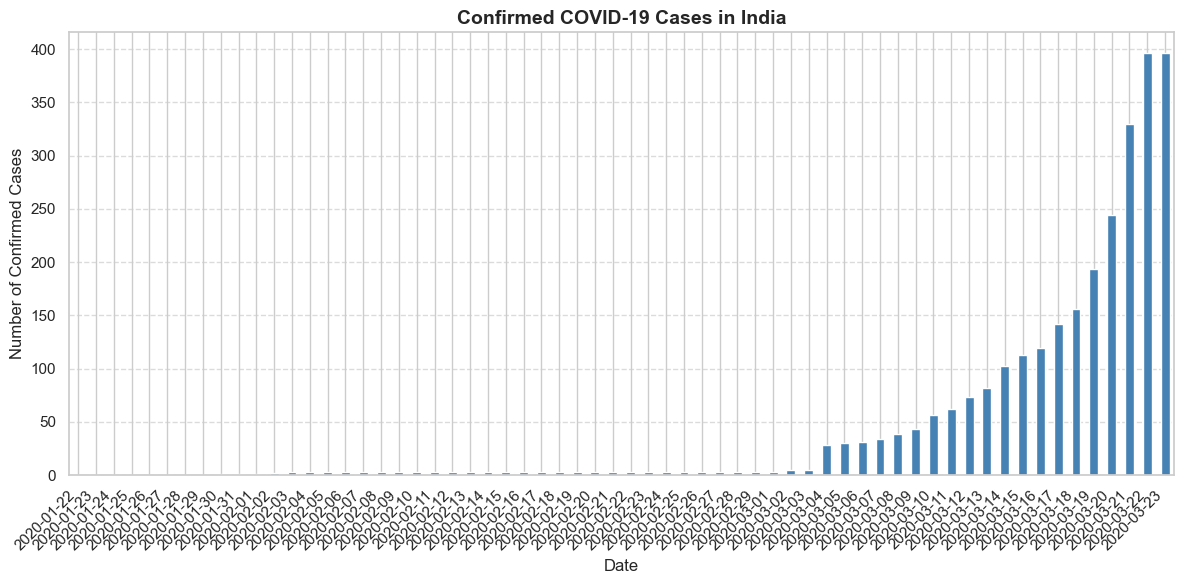

In [91]:
India.plot(x='Date', y='Confirmed_Cases', kind="bar", color='steelblue', figsize=(12, 6), legend=False)
plt.title("Confirmed COVID-19 Cases in India", fontsize=14, fontweight='bold')
plt.xlabel("Date")
plt.ylabel("Number of Confirmed Cases")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


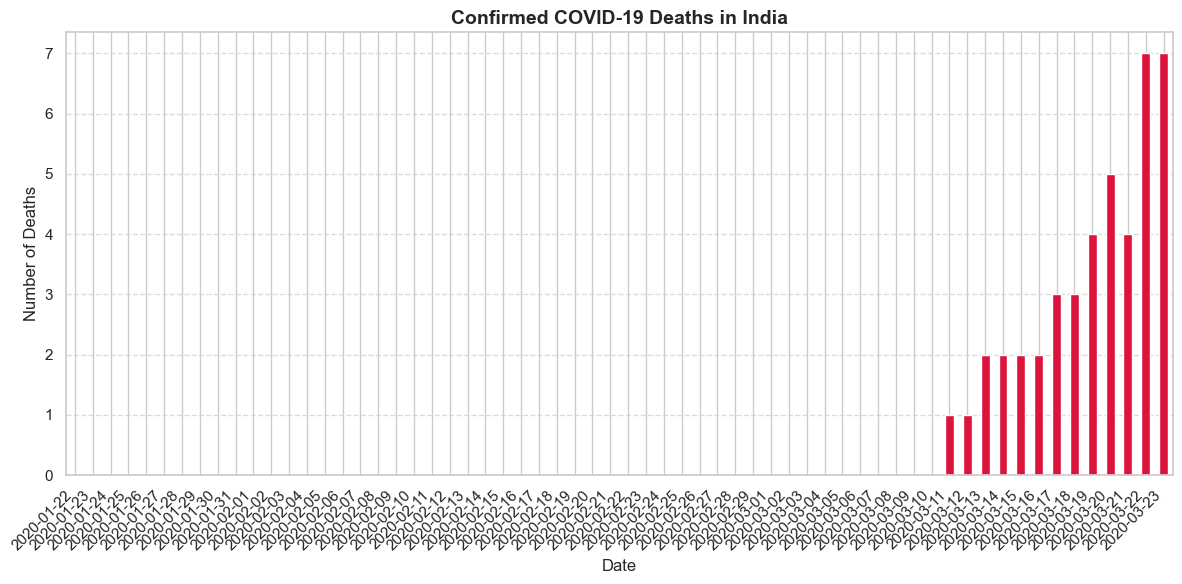

In [92]:
India.plot(x='Date', y='Deaths', kind="bar", color='crimson', figsize=(12, 6), legend=False)
plt.title("Confirmed COVID-19 Deaths in India", fontsize=14, fontweight='bold')
plt.xlabel("Date")
plt.ylabel("Number of Deaths")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


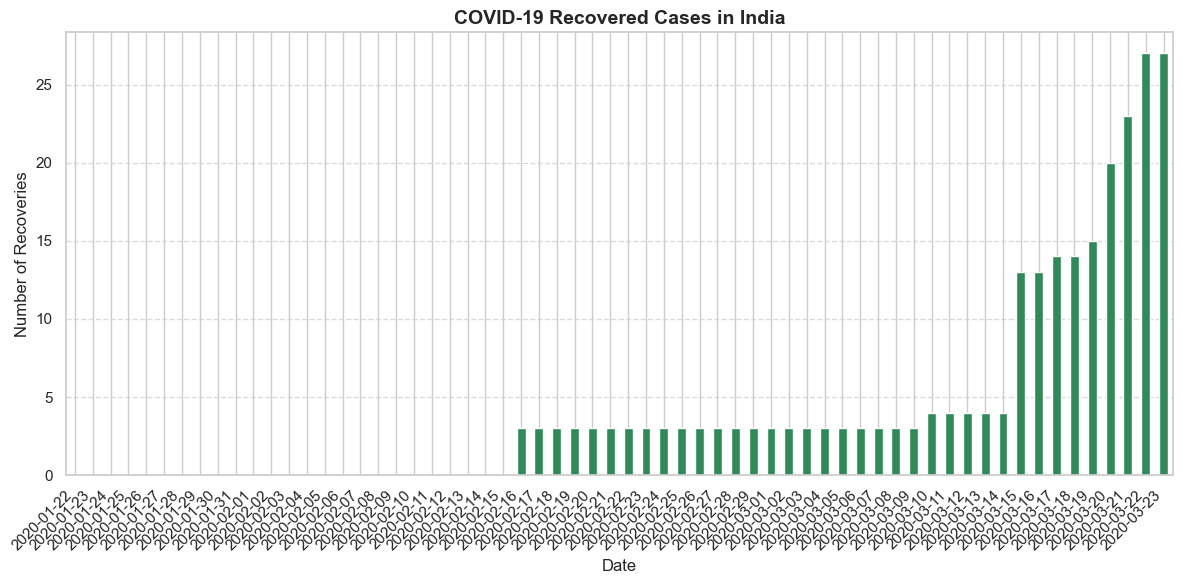

In [93]:
India.plot(x='Date', y='Recovered', kind="bar", color='seagreen', figsize=(12, 6), legend=False)
plt.title("COVID-19 Recovered Cases in India", fontsize=14, fontweight='bold')
plt.xlabel("Date")
plt.ylabel("Number of Recoveries")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


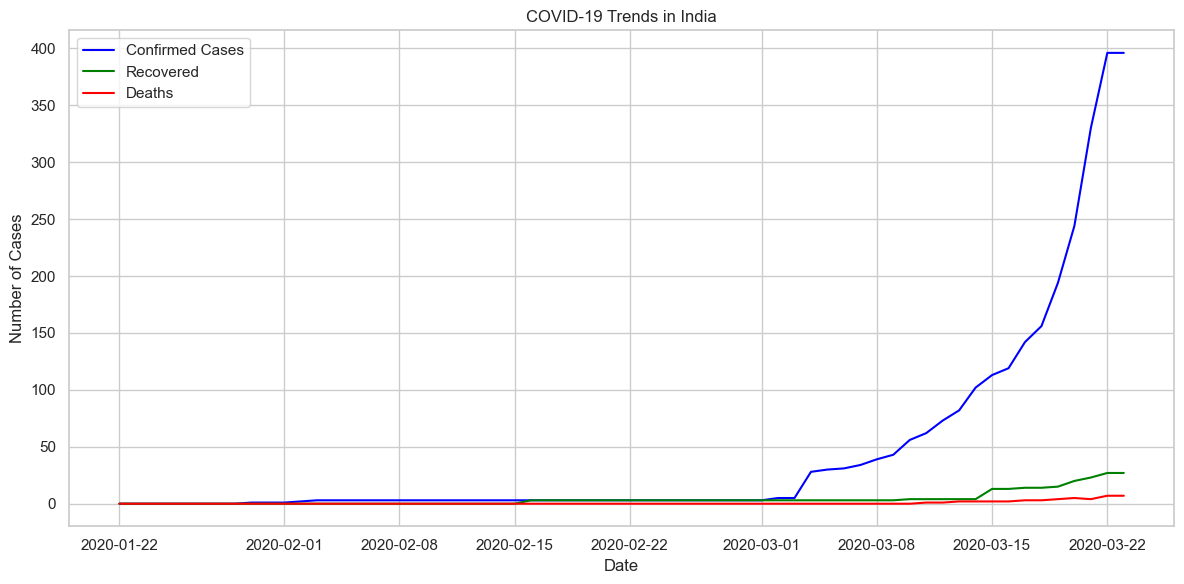

In [94]:
India = final[final['Country']=="India"]
x = India.index.values

plt.figure(figsize=(12, 6))
plt.plot(India.index, India['Cases'], label='Confirmed Cases', color='blue')
plt.plot(India.index, India['Recovered'], label='Recovered', color='green')
plt.plot(India.index, India['Deaths'], label='Deaths', color='red')
plt.title('COVID-19 Trends in India')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('Analysis Pics/India_Trends.png')
plt.show()


#### Data Visualization - USA

In [95]:
USA = Combined_df[Combined_df['Country/Region']=='US']
USA.iloc[-1]

Country/Region             US
Date               2020-03-23
Confirmed_Cases       33276.0
Deaths                  417.0
Recovered               178.0
Name: 10725, dtype: object

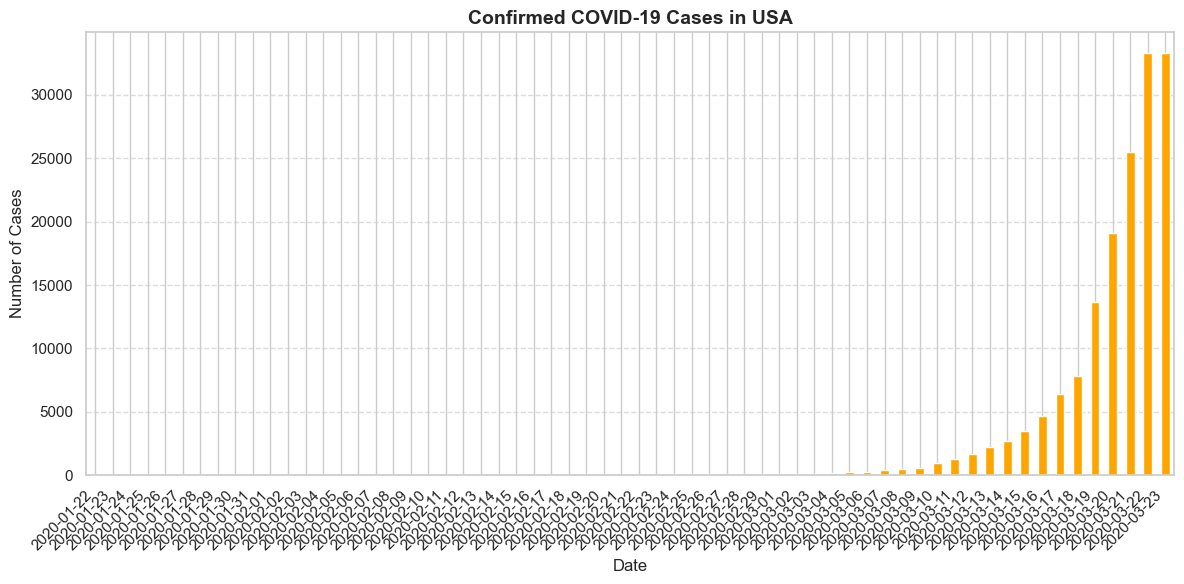

In [96]:
USA.plot(x='Date', y='Confirmed_Cases', kind="bar", color='orange', figsize=(12, 6), legend=False)
plt.title("Confirmed COVID-19 Cases in USA", fontsize=14, fontweight='bold')
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


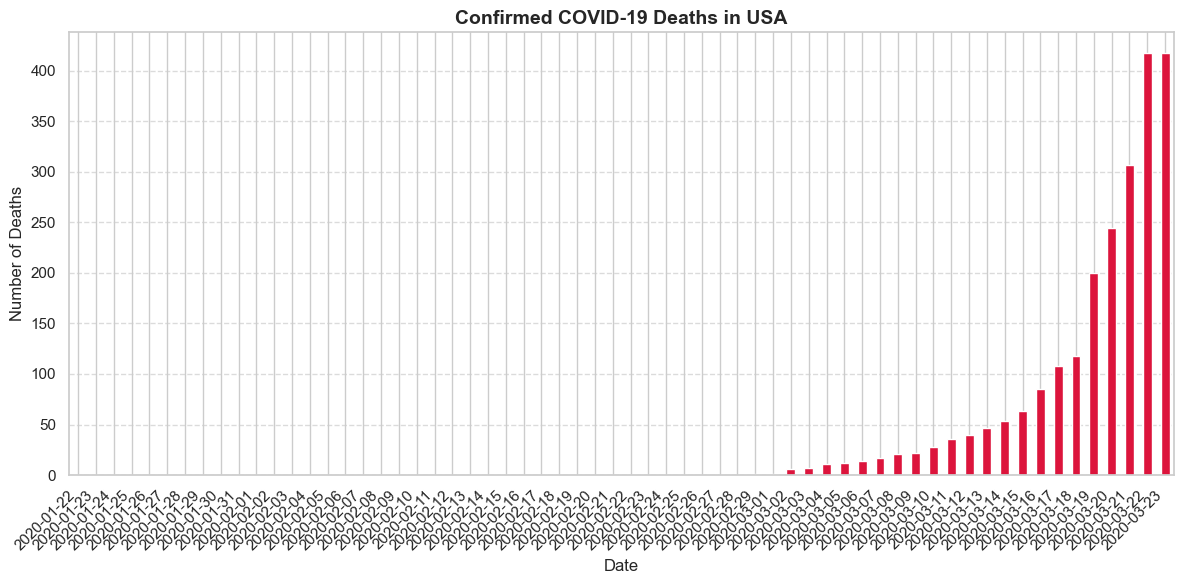

In [97]:
USA.plot(x='Date', y='Deaths', kind="bar", color='crimson', figsize=(12, 6), legend=False)
plt.title("Confirmed COVID-19 Deaths in USA", fontsize=14, fontweight='bold')
plt.xlabel("Date")
plt.ylabel("Number of Deaths")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


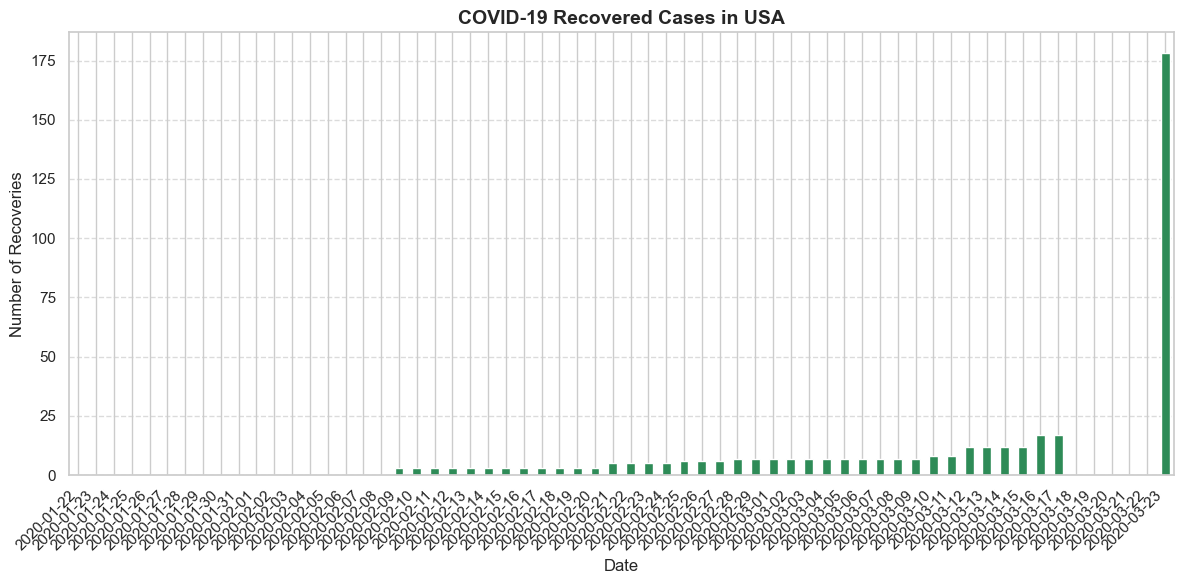

In [98]:
USA.plot(x='Date', y='Recovered', kind="bar", color='seagreen', figsize=(12, 6), legend=False)
plt.title("COVID-19 Recovered Cases in USA", fontsize=14, fontweight='bold')
plt.xlabel("Date")
plt.ylabel("Number of Recoveries")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


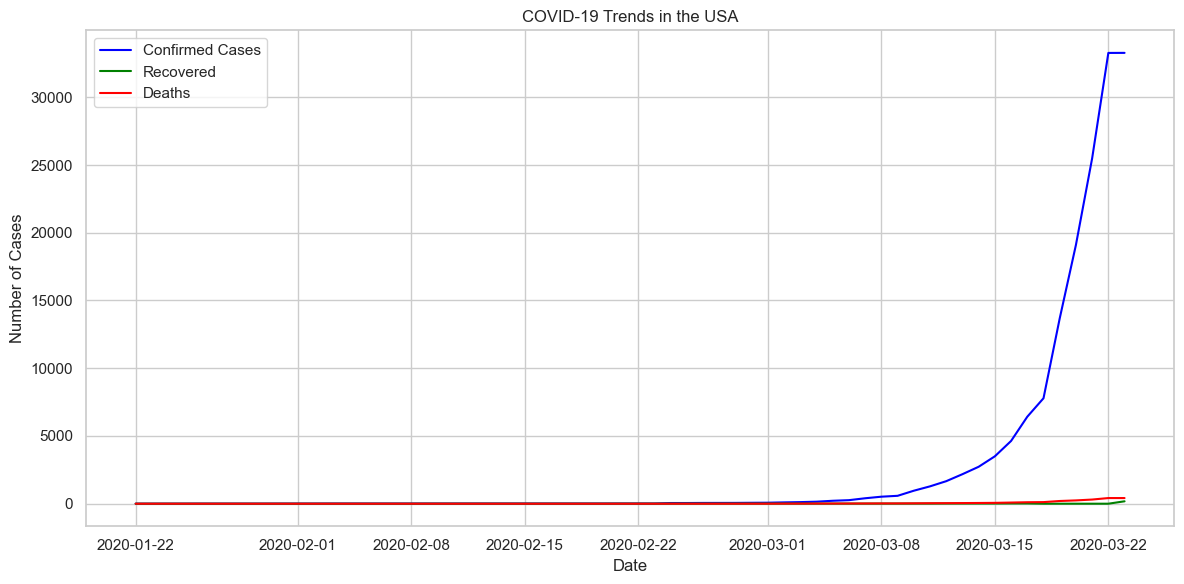

In [99]:
USA = final[final['Country']=="US"]
x = USA.index.values

plt.figure(figsize=(12, 6))
plt.plot(USA.index, USA['Cases'], label='Confirmed Cases', color='blue')
plt.plot(USA.index, USA['Recovered'], label='Recovered', color='green')
plt.plot(USA.index, USA['Deaths'], label='Deaths', color='red')
plt.title('COVID-19 Trends in the USA')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('Analysis Pics/USA_Trends.png')
plt.show()


#### Data Visualization - China

In [100]:
China = Combined_df[Combined_df['Country/Region']=='China']
China.iloc[-1]

Country/Region          China
Date               2020-03-23
Confirmed_Cases       81439.0
Deaths                 3274.0
Recovered             72814.0
Name: 2107, dtype: object

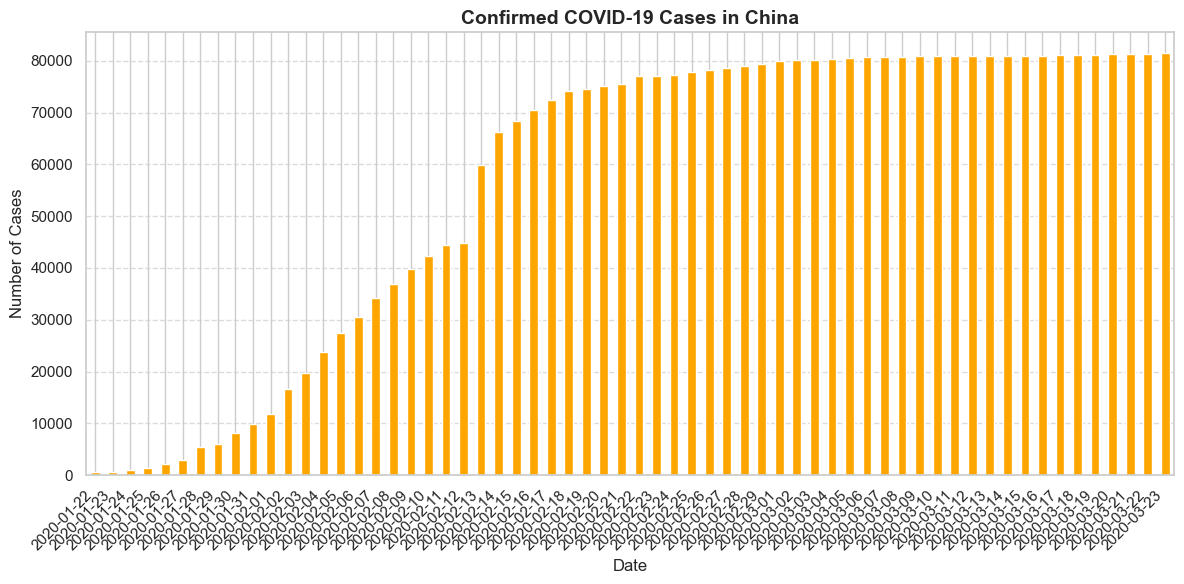

In [101]:
China.plot(x='Date', y='Confirmed_Cases', kind="bar", color='orange', figsize=(12, 6), legend=False)
plt.title("Confirmed COVID-19 Cases in China", fontsize=14, fontweight='bold')
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


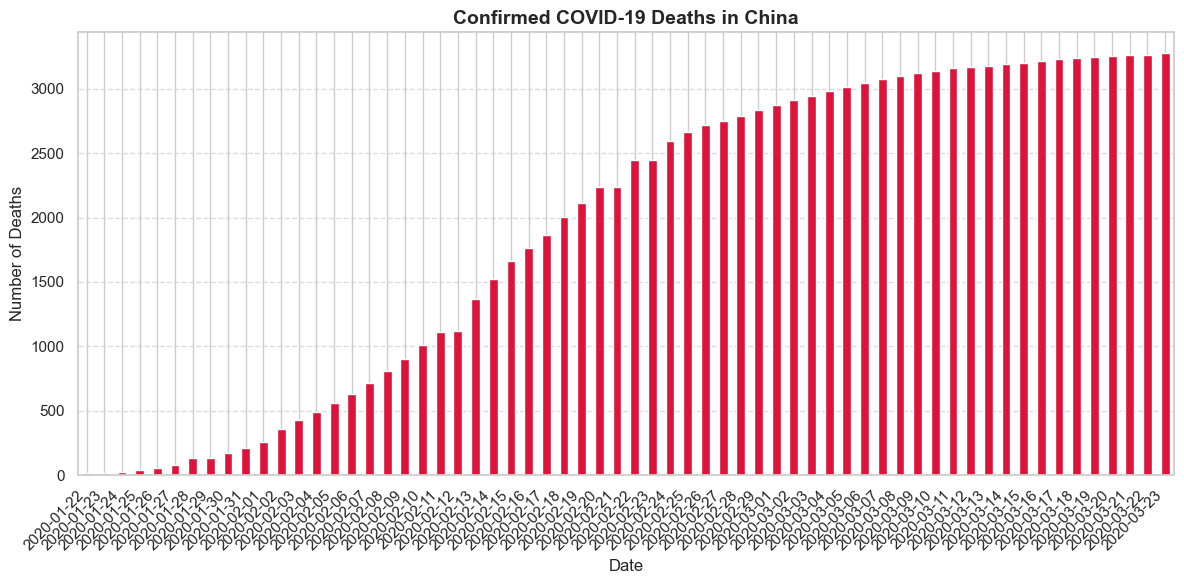

In [102]:
China.plot(x='Date', y='Deaths', kind="bar", color='crimson', figsize=(12, 6), legend=False)
plt.title("Confirmed COVID-19 Deaths in China", fontsize=14, fontweight='bold')
plt.xlabel("Date")
plt.ylabel("Number of Deaths")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


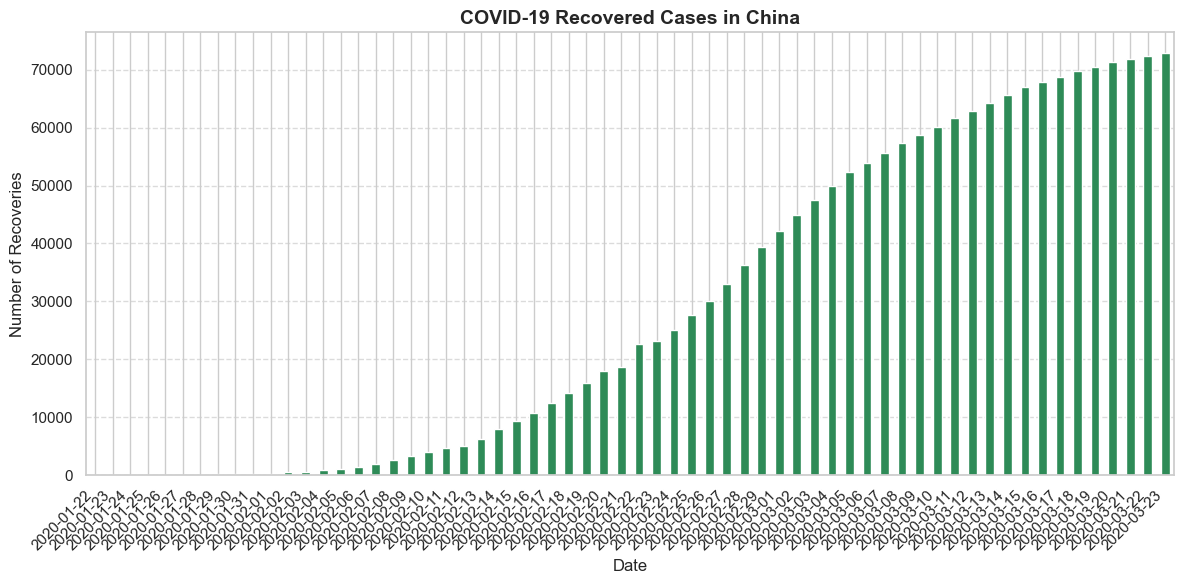

In [103]:
China.plot(x='Date', y='Recovered', kind="bar", color='seagreen', figsize=(12, 6), legend=False)
plt.title("COVID-19 Recovered Cases in China", fontsize=14, fontweight='bold')
plt.xlabel("Date")
plt.ylabel("Number of Recoveries")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


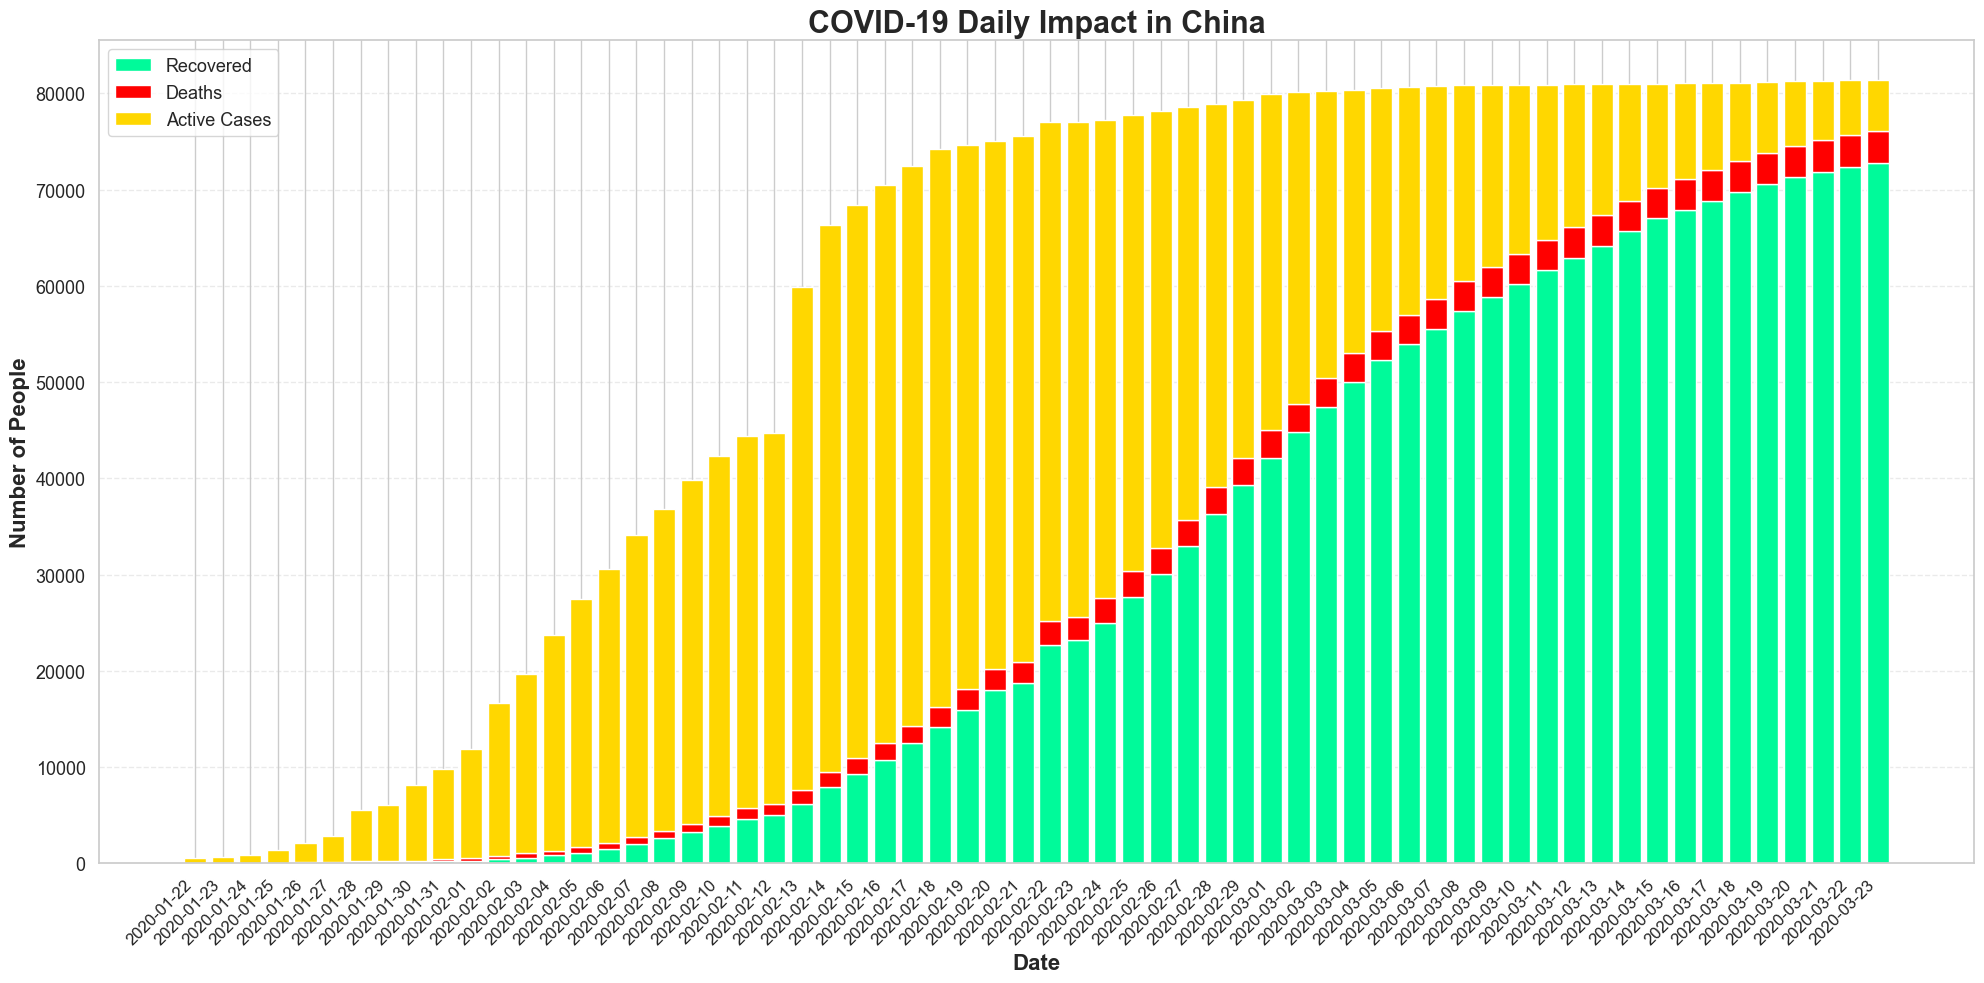

In [104]:
China = final[final['Country'] == "China"]
x = China.index.values

fig, ax = plt.subplots(figsize=(20, 10))

# Stacked bars
ax.bar(x, China['Recovered'], color='mediumspringgreen', label='Recovered')
ax.bar(x, China['Deaths'], bottom=China['Recovered'], color='red', label='Deaths')
ax.bar(x, China['Cases'] - China['Recovered'] - China['Deaths'],
       bottom=China['Recovered'] + China['Deaths'], color='gold', label='Active Cases')

# Labels and title
plt.title("COVID-19 Daily Impact in China", fontsize=22, fontweight='bold')
plt.xlabel('Date', fontsize=16, fontweight='bold')
plt.ylabel('Number of People', fontsize=16, fontweight='bold')

# X-axis ticks
# Use 'Date' column if available, else format index if it's a datetime index
if 'Date' in China.columns:
    plt.xticks(x, China['Date'], rotation=45, ha='right', fontsize=12)
else:
    plt.xticks(x, China.index.strftime('%Y-%m-%d'), rotation=45, ha='right', fontsize=12)

# Y-axis style
plt.yticks(fontsize=13)
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Legend
plt.legend(fontsize=13)

# Layout and save
plt.tight_layout()
plt.savefig('Analysis Pics/China_Simple.png', dpi=300)
plt.show()



#### Data Visualization - Italy

In [105]:
Italy = Combined_df[Combined_df['Country/Region']=='Italy']
Italy.iloc[-1]

Country/Region          Italy
Date               2020-03-23
Confirmed_Cases       59138.0
Deaths                 5476.0
Recovered              7024.0
Name: 5393, dtype: object

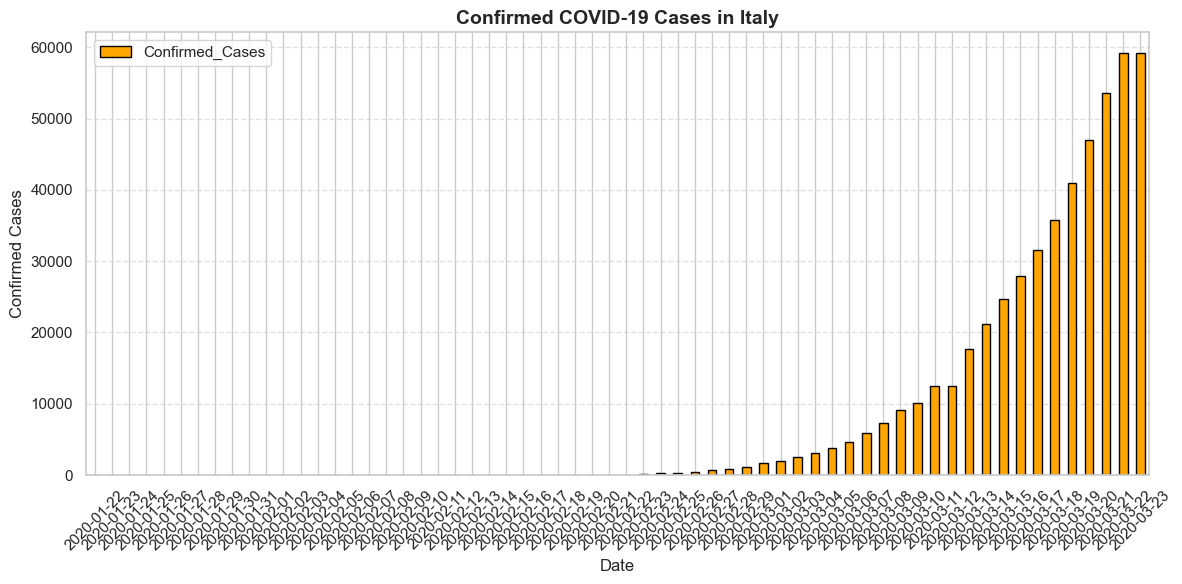

In [106]:
# Confirmed Cases in Italy
Italy.plot(x='Date', y='Confirmed_Cases', kind="bar", color='orange', figsize=(12, 6), edgecolor='black')
plt.title("Confirmed COVID-19 Cases in Italy", fontsize=14, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Confirmed Cases", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

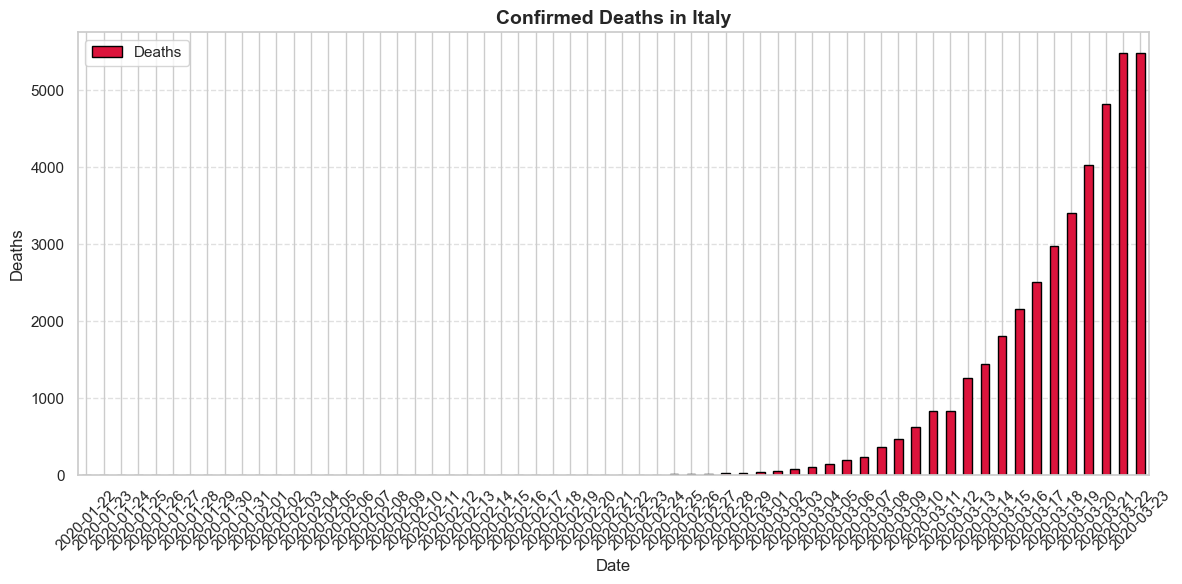

In [107]:
Italy.plot(x='Date', y='Deaths', kind="bar", color='crimson', figsize=(12, 6), edgecolor='black')
plt.title("Confirmed Deaths in Italy", fontsize=14, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Deaths", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

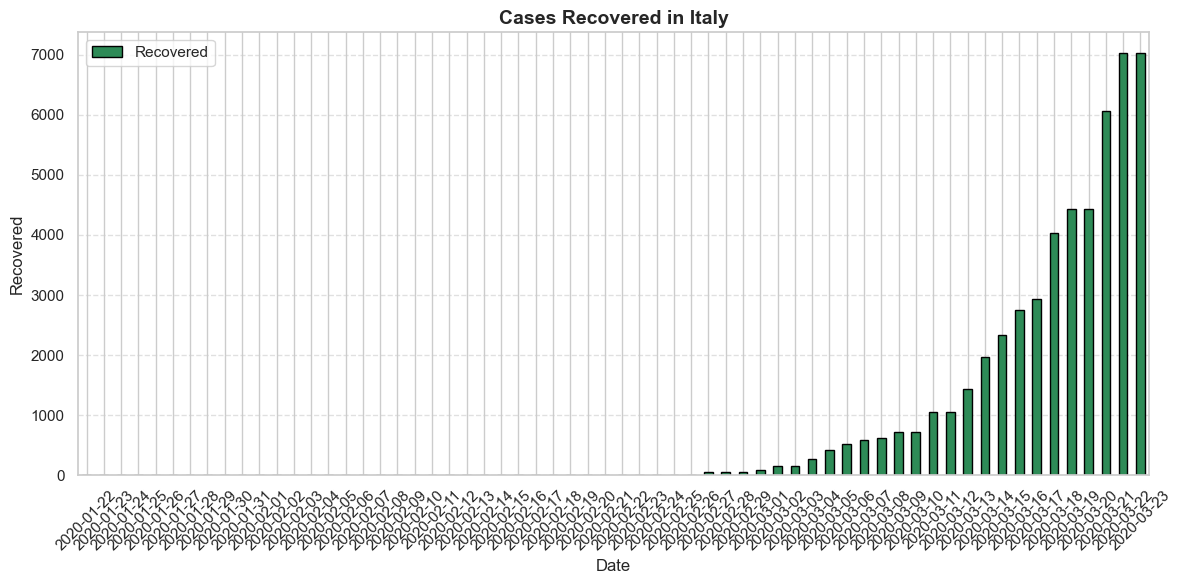

In [108]:
# Recovered Cases in Italy
Italy.plot(x='Date', y='Recovered', kind="bar", color='seagreen', figsize=(12, 6), edgecolor='black')
plt.title("Cases Recovered in Italy", fontsize=14, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Recovered", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

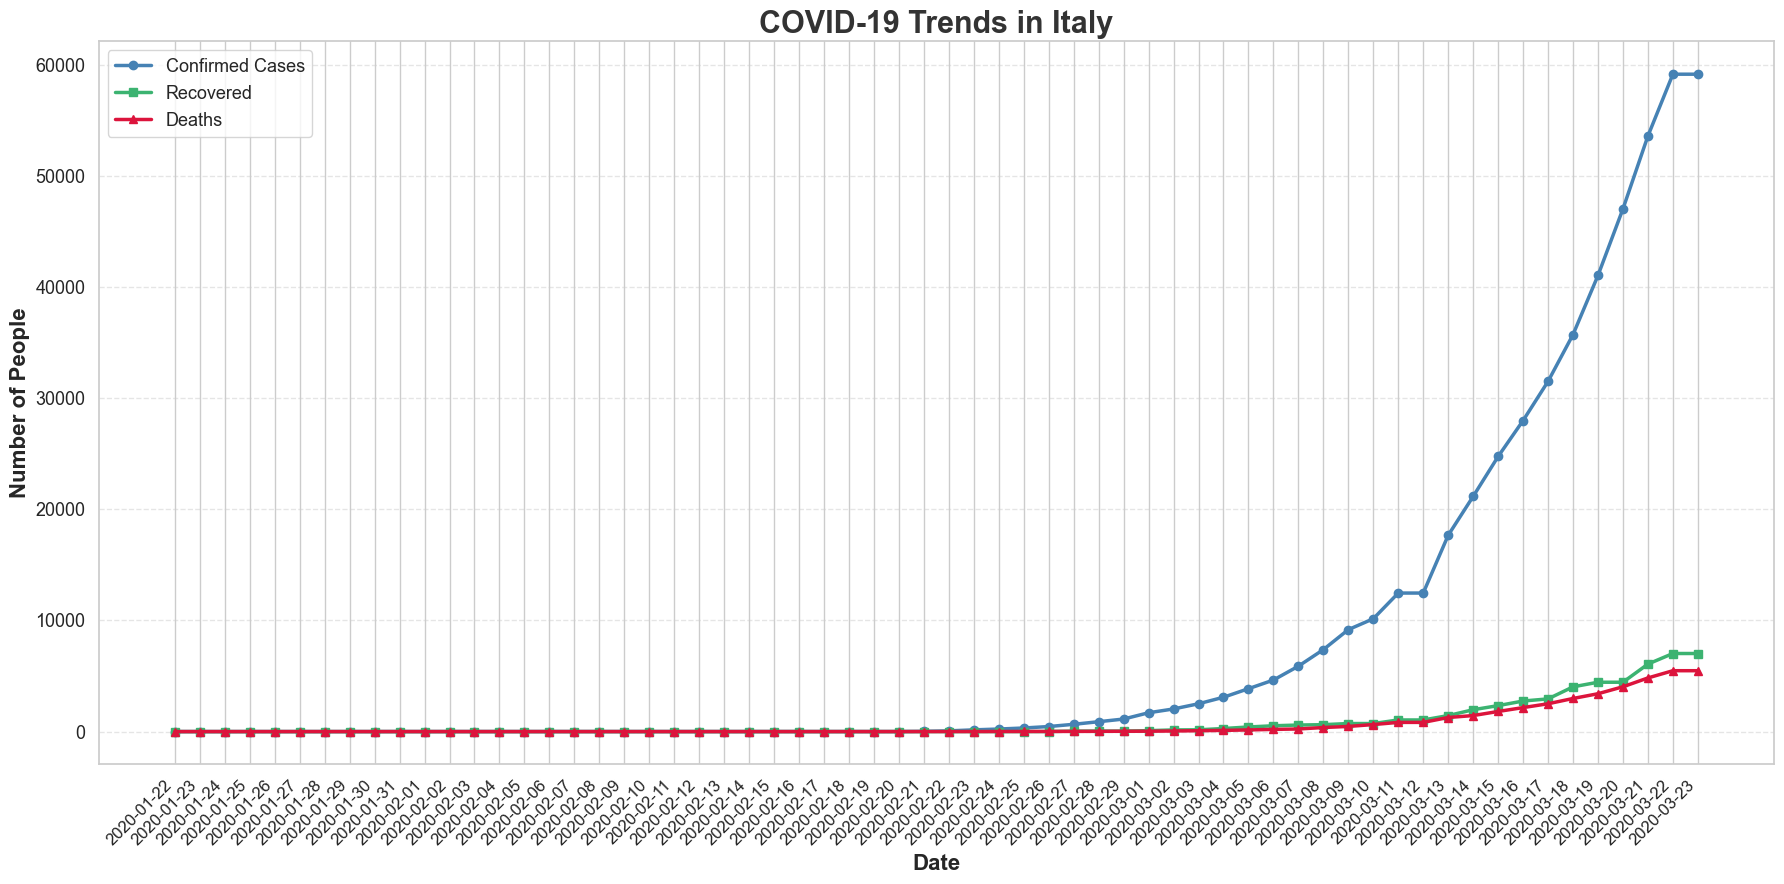

In [109]:
Italy = final[final['Country'] == "Italy"]
x = Italy.index.values

fig, ax = plt.subplots(figsize=(18, 9))

# Plot lines with markers
ax.plot(x, Italy['Cases'], marker='o', color='steelblue', linewidth=2.5, label='Confirmed Cases')
ax.plot(x, Italy['Recovered'], marker='s', color='mediumseagreen', linewidth=2.5, label='Recovered')
ax.plot(x, Italy['Deaths'], marker='^', color='crimson', linewidth=2.5, label='Deaths')

# Title and labels
plt.title("COVID-19 Trends in Italy", fontsize=22, fontweight='bold', color='#333333')
plt.xlabel('Date', fontsize=16, fontweight='bold')
plt.ylabel('Number of People', fontsize=16, fontweight='bold')

# Format X-axis ticks
if 'Date' in Italy.columns:
    plt.xticks(x, Italy['Date'], rotation=45, ha='right', fontsize=12)
else:
    plt.xticks(x, Italy.index.strftime('%Y-%m-%d'), rotation=45, ha='right', fontsize=12)

# Y-axis
plt.yticks(fontsize=13)
plt.grid(True, which='major', axis='y', linestyle='--', alpha=0.5)

# Legend
plt.legend(fontsize=13)

# Layout and save
plt.tight_layout()
plt.savefig('Analysis Pics/Italy_Line_Chart.png', dpi=300)
plt.show()


#### Data Visualization - Spain

In [110]:
Spain = Combined_df[Combined_df['Country/Region']=='Spain']
Spain.iloc[-1]

Country/Region          Spain
Date               2020-03-23
Confirmed_Cases       28768.0
Deaths                 1772.0
Recovered              2575.0
Name: 9671, dtype: object

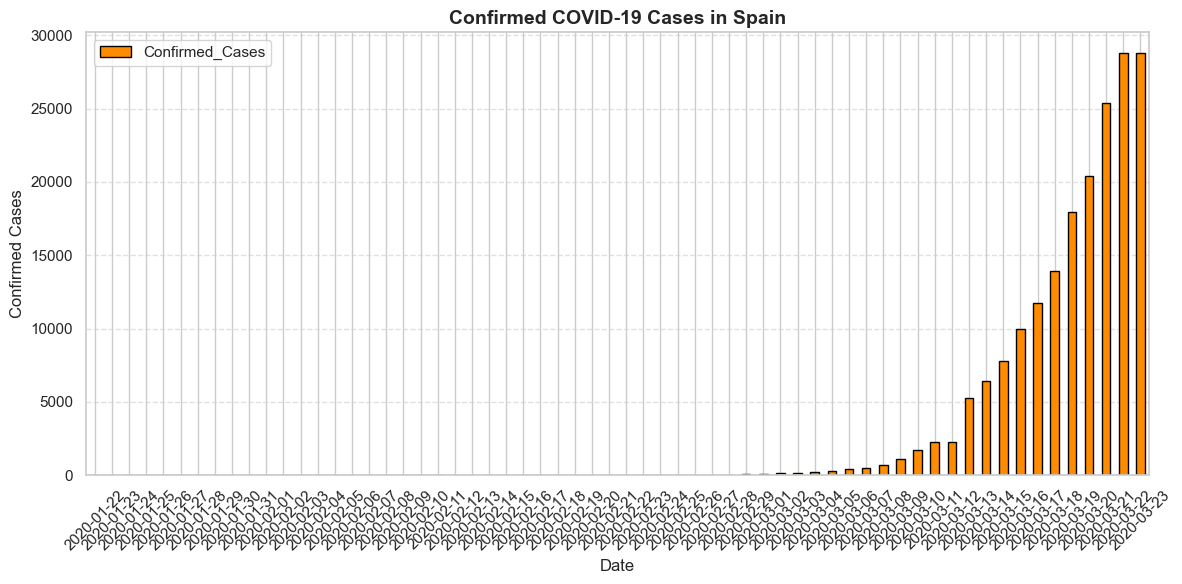

In [111]:
# Confirmed Cases in Spain
Spain.plot(x='Date', y='Confirmed_Cases', kind='bar', color='darkorange', figsize=(12, 6), edgecolor='black')
plt.title("Confirmed COVID-19 Cases in Spain", fontsize=14, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Confirmed Cases", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

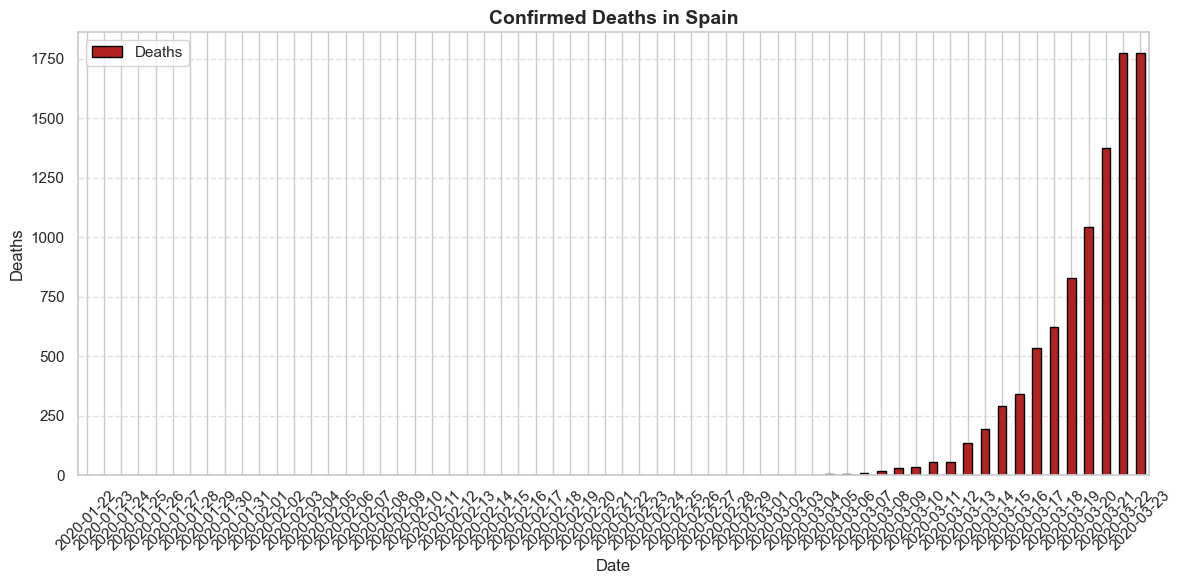

In [112]:
# Confirmed Deaths in Spain
Spain.plot(x='Date', y='Deaths', kind='bar', color='firebrick', figsize=(12, 6), edgecolor='black')
plt.title("Confirmed Deaths in Spain", fontsize=14, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Deaths", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

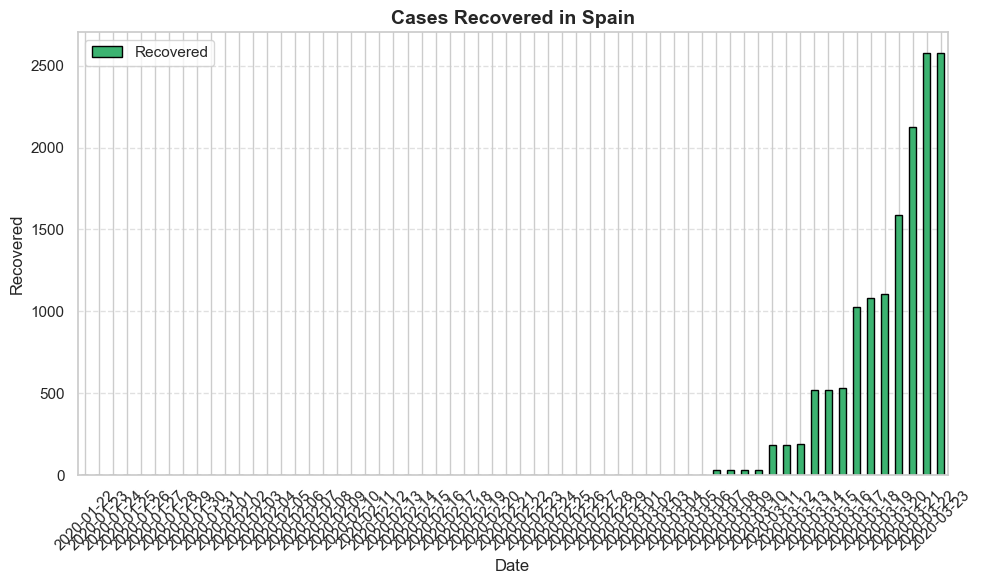

In [113]:
# Recovered Cases in Spain
Spain.plot(x='Date', y='Recovered', kind='bar', color='mediumseagreen', figsize=(10, 6), edgecolor='black')
plt.title("Cases Recovered in Spain", fontsize=14, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Recovered", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

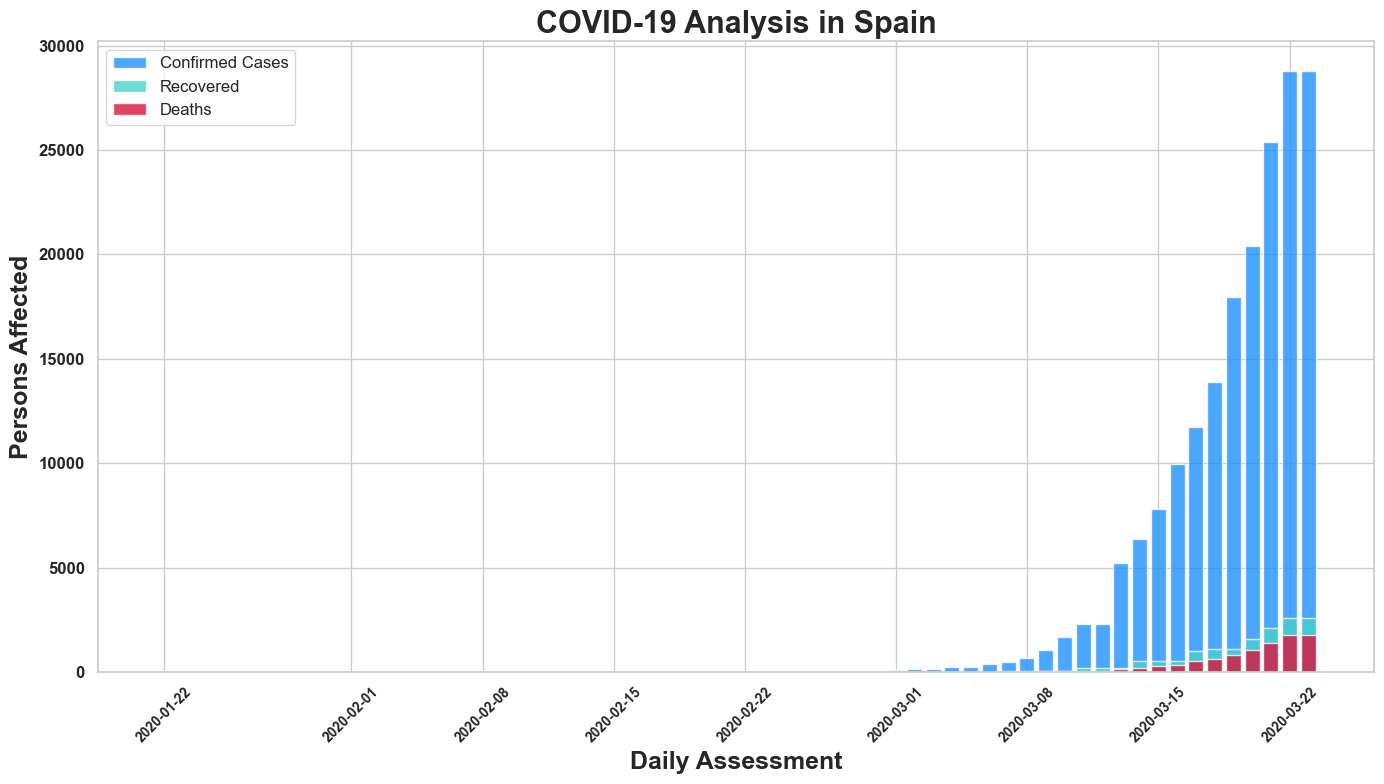

In [114]:
Spain = final[final['Country'] == "Spain"]
x = Spain.index.values

# Create figure
fig, ax = plt.subplots(figsize=(14, 8))

# Plot bars with improved colors and slight transparency
plt.bar(x, Spain['Cases'], label='Confirmed Cases', color='dodgerblue', alpha=0.8)
plt.bar(x, Spain['Recovered'], label='Recovered', color='mediumturquoise', alpha=0.8)
plt.bar(x, Spain['Deaths'], label='Deaths', color='crimson', alpha=0.8)

# Labels and title
plt.xlabel('Daily Assessment', fontsize=18, fontweight='bold')
plt.ylabel('Persons Affected', fontsize=18, fontweight='bold')
plt.title('COVID-19 Analysis in Spain', fontsize=22, fontweight='bold')

# X and Y ticks
plt.xticks(fontsize=10, fontweight='bold', rotation=45)
plt.yticks(fontsize=12, fontweight='bold')

# Optional: reduce clutter by skipping x-ticks
# ax.set_xticks(x[::5])

# Legend
plt.legend(fontsize=12)

# Save and show
plt.tight_layout()
plt.savefig('Analysis Pics/Spain.png', dpi=300)
plt.show()


#### Data Visualization - Germany

In [115]:
Germany = Combined_df[Combined_df['Country/Region']=='Germany']
Germany.iloc[-1]

Country/Region        Germany
Date               2020-03-23
Confirmed_Cases       24873.0
Deaths                   94.0
Recovered               266.0
Name: 4029, dtype: object

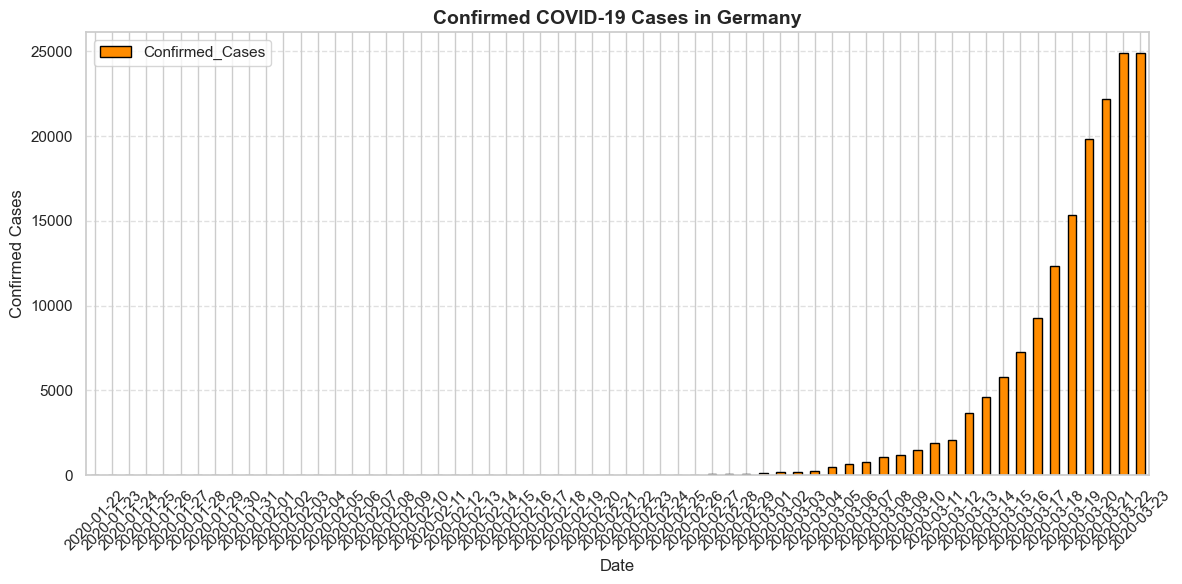

In [116]:
# Confirmed Cases in Germany
Germany.plot(x='Date', y='Confirmed_Cases', kind='bar', color='darkorange', figsize=(12, 6), edgecolor='black')
plt.title("Confirmed COVID-19 Cases in Germany", fontsize=14, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Confirmed Cases", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

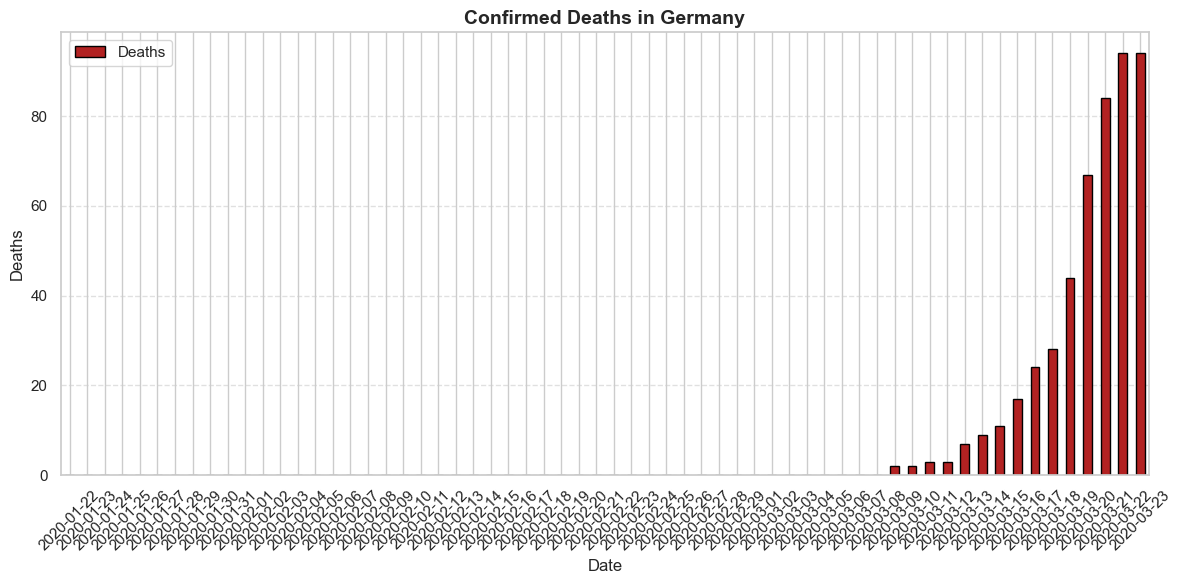

In [117]:
# Confirmed Deaths in Germany
Germany.plot(x='Date', y='Deaths', kind='bar', color='firebrick', figsize=(12, 6), edgecolor='black')
plt.title("Confirmed Deaths in Germany", fontsize=14, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Deaths", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

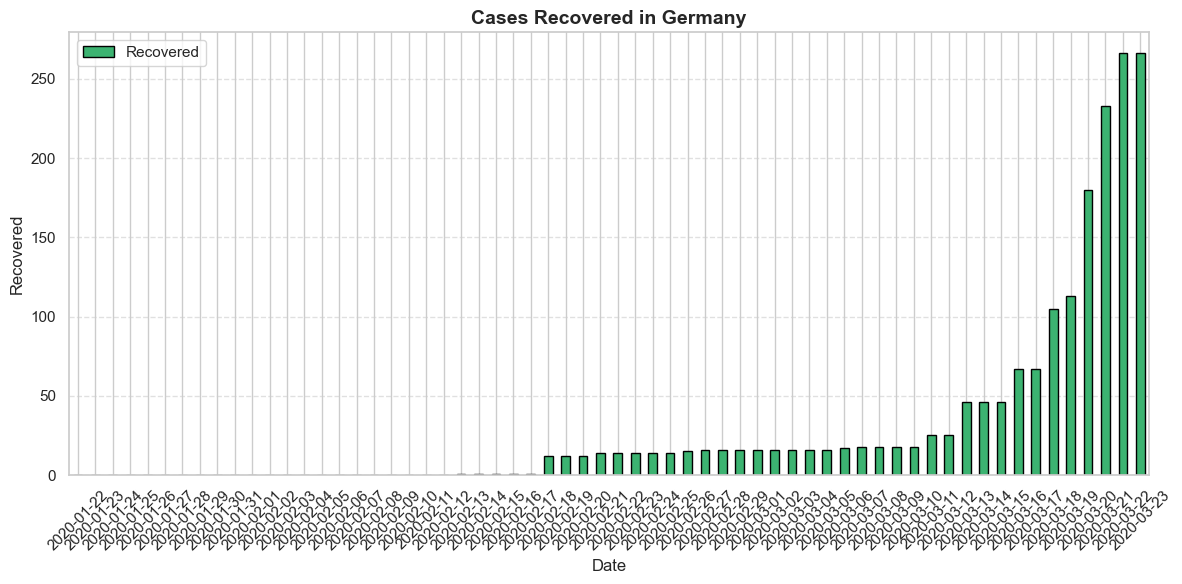

In [118]:
# Recovered Cases in Germany
Germany.plot(x='Date', y='Recovered', kind='bar', color='mediumseagreen', figsize=(12, 6), edgecolor='black')
plt.title("Cases Recovered in Germany", fontsize=14, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Recovered", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

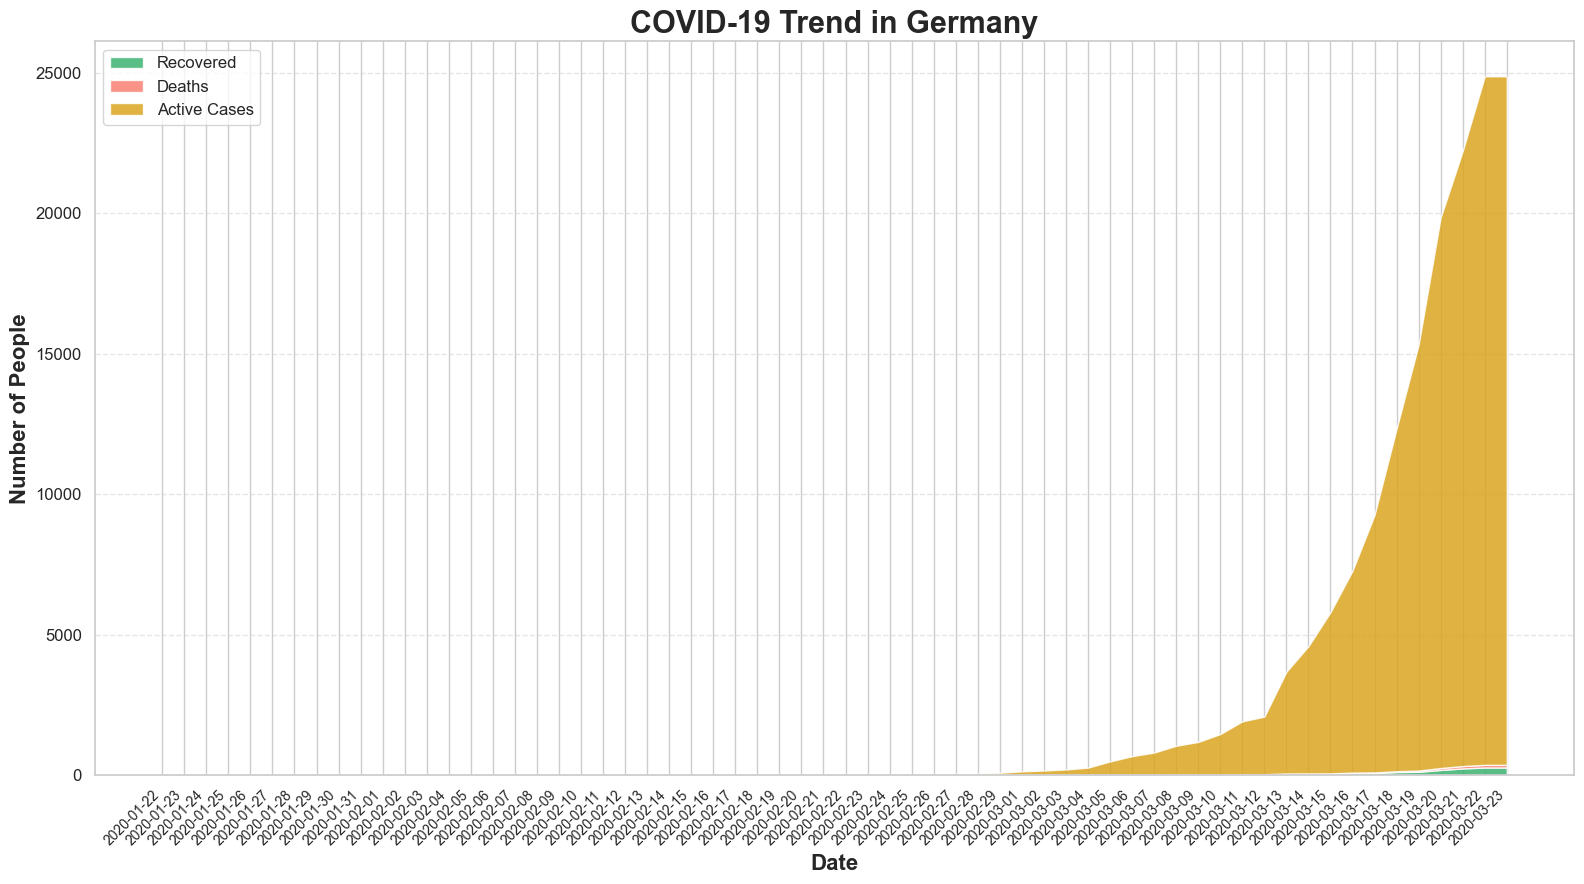

In [119]:
import matplotlib.pyplot as plt

# Filter data for Germany
Germany = final[final['Country'] == "Germany"]
x = Germany.index.values

# Prepare data
recovered = Germany['Recovered']
deaths = Germany['Deaths']
active = Germany['Cases'] - recovered - deaths

# Stacked area values
data = [recovered, deaths, active]
labels = ['Recovered', 'Deaths', 'Active Cases']
colors = ['mediumseagreen', 'salmon', 'goldenrod']

# Create figure
fig, ax = plt.subplots(figsize=(16, 9))

# Plot stacked area chart
ax.stackplot(x, data, labels=labels, colors=colors, alpha=0.85)

# Labels and title
plt.title('COVID-19 Trend in Germany', fontsize=22, fontweight='bold')
plt.xlabel('Date', fontsize=16, fontweight='bold')
plt.ylabel('Number of People', fontsize=16, fontweight='bold')

# X-axis ticks
if 'Date' in Germany.columns:
    plt.xticks(x, Germany['Date'], rotation=45, ha='right', fontsize=10)
else:
    plt.xticks(x, Germany.index.strftime('%Y-%m-%d'), rotation=45, ha='right', fontsize=10)

# Y-axis
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Legend
plt.legend(loc='upper left', fontsize=12)

# Layout
plt.tight_layout()
plt.savefig('Analysis Pics/Germany_Area_Chart.png', dpi=300)
plt.show()


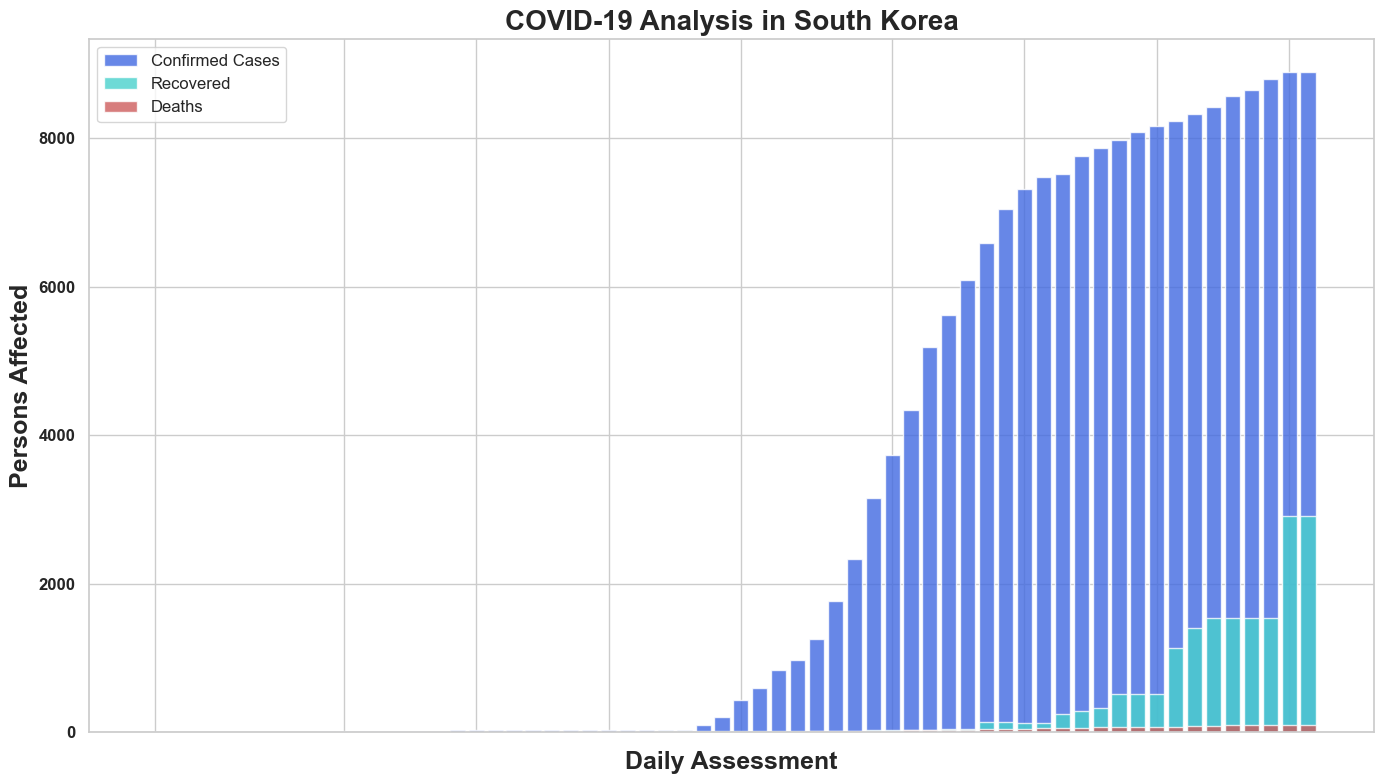

In [120]:
# Filter data for Korea
Korea = final[final['Country'] == "Korea, South"]
x = Korea.index.values

# Create the figure
fig, ax = plt.subplots(figsize=(14, 8))

# Plot bars with light overlap using alpha
plt.bar(x, Korea['Cases'], label='Confirmed Cases', color='royalblue', alpha=0.8)
plt.bar(x, Korea['Recovered'], label='Recovered', color='mediumturquoise', alpha=0.8)
plt.bar(x, Korea['Deaths'], label='Deaths', color='indianred', alpha=0.8)

# Labels and title
plt.xlabel('Daily Assessment', fontsize=18, fontweight='bold')
plt.ylabel('Persons Affected', fontsize=18, fontweight='bold')
plt.title('COVID-19 Analysis in South Korea', fontsize=20, fontweight='bold')
plt.xticks(fontsize=10, fontweight='bold', rotation=45)
plt.yticks(fontsize=12, fontweight='bold')

# Hide x-axis label names (can be turned off if dates aren't needed)
ax.xaxis.set_major_formatter(plt.NullFormatter())

# Legend
plt.legend(fontsize=12)

# Save and show
plt.tight_layout()
plt.savefig('Analysis Pics/South Korea.png', dpi=300)
plt.show()


#### Data Visualization - Entire World

In [121]:
World = Combined_df[['Date','Confirmed_Cases','Deaths','Recovered']]
World = World.groupby('Date').sum()
World = World.reset_index(level=['Date'])
World

,Date,Confirmed_Cases,Deaths,Recovered
0,2020-01-22,555.0,17.0,28.0
1,2020-01-23,653.0,18.0,30.0
2,2020-01-24,941.0,26.0,36.0
3,2020-01-25,1434.0,42.0,39.0
4,2020-01-26,2118.0,56.0,52.0
...,...,...,...,...
57,2020-03-19,242708.0,9867.0,84854.0
58,2020-03-20,272166.0,11299.0,87256.0
59,2020-03-21,304524.0,12973.0,91499.0
60,2020-03-22,335955.0,14632.0,97704.0


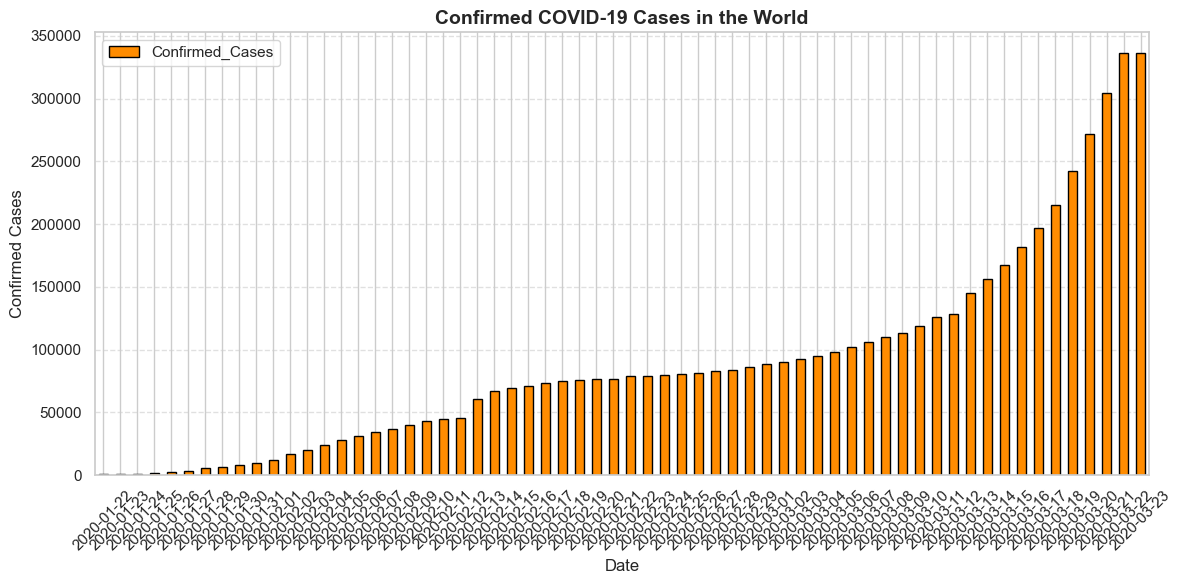

In [122]:
# Confirmed Cases in World
World.plot(x='Date', y='Confirmed_Cases', kind='bar', color='darkorange', figsize=(12, 6), edgecolor='black')
plt.title("Confirmed COVID-19 Cases in the World", fontsize=14, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Confirmed Cases", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

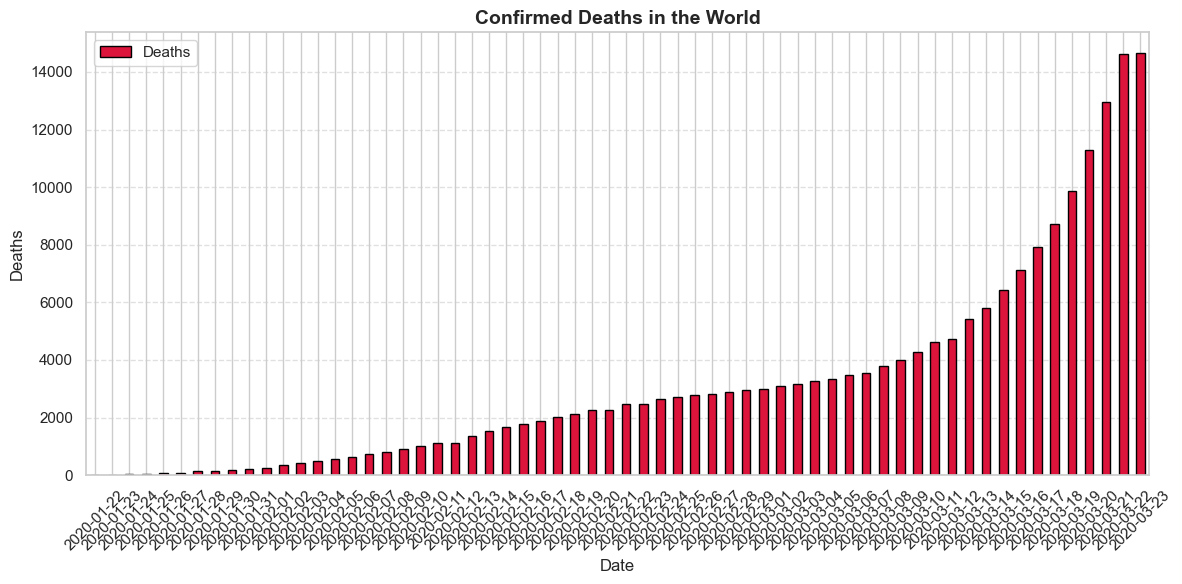

In [123]:
# Deaths in World
World.plot(x='Date', y='Deaths', kind='bar', color='crimson', figsize=(12, 6), edgecolor='black')
plt.title("Confirmed Deaths in the World", fontsize=14, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Deaths", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

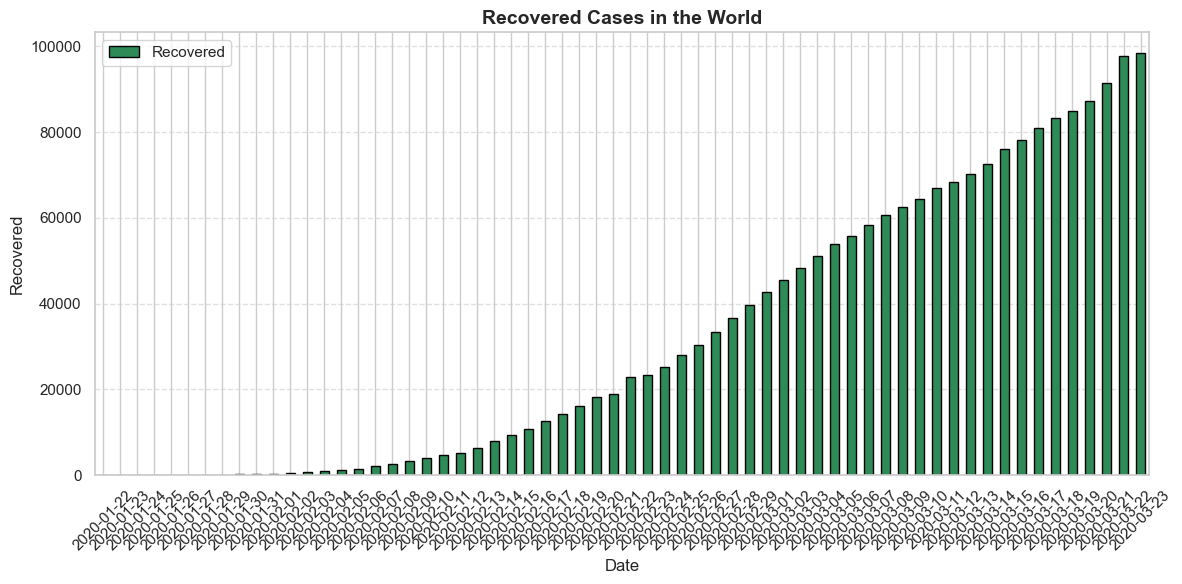

In [124]:
# Recovered Cases in World
World.plot(x='Date', y='Recovered', kind='bar', color='seagreen', figsize=(12, 6), edgecolor='black')
plt.title("Recovered Cases in the World", fontsize=14, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Recovered", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

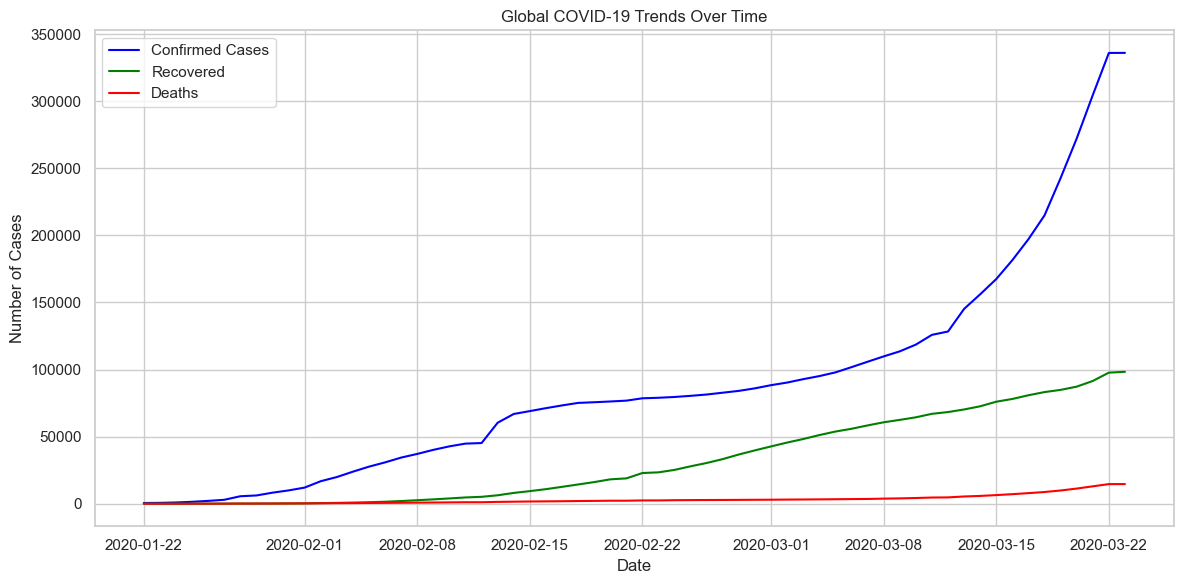

In [125]:
World = final.groupby(['Date']).sum()
x = World.index.values
plt.figure(figsize=(12, 6))
plt.plot(World.index, World['Cases'], label='Confirmed Cases', color='blue')
plt.plot(World.index, World['Recovered'], label='Recovered', color='green')
plt.plot(World.index, World['Deaths'], label='Deaths', color='red')
plt.title('Global COVID-19 Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('Analysis Pics/Global_Trends.png')
plt.show()


In [126]:
test = pd.read_csv("Data/Test-Done.csv")
test = pd.DataFrame(test)
test

,Country,Total tests
0,China,320000
1,Germany,167000
2,Italy,206886
3,USA,37646
4,Spain,30000
5,India,14514
6,South Korea,316664
7,Iran,80000


In [127]:
test = test.astype({'Total tests':float}) 
test = test.sort_values(by='Total tests', ascending=True)

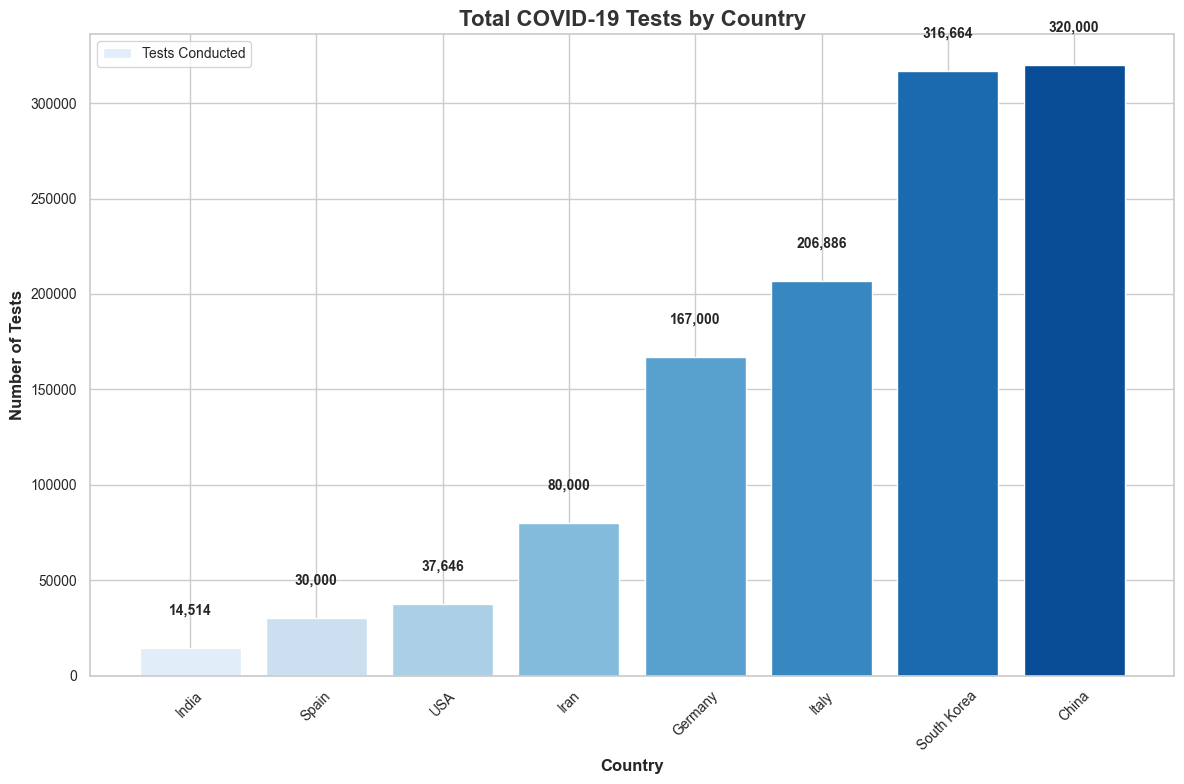

In [128]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.bar(test['Country'], test['Total tests'], color=sns.color_palette("Blues", len(test)))

for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.05 * max(test['Total tests']),
            f'{int(yval):,}', ha='center', va='bottom', fontsize=10, fontweight='semibold')

ax.set_title("Total COVID-19 Tests by Country", fontsize=16, fontweight='bold', color='#333')
ax.set_xlabel("Country", fontsize=12, fontweight='bold')
ax.set_ylabel("Number of Tests", fontsize=12, fontweight='bold')
ax.tick_params(axis='x', rotation=45)
ax.tick_params(axis='both', labelsize=10)

ax.legend(['Tests Conducted'], loc='upper left', fontsize=10)

plt.tight_layout()
plt.savefig('Analysis Pics/Test.png', dpi=300, bbox_inches='tight')
plt.show()

In [129]:
latest = final.loc[final.index.max()]
top_5_countries = final.groupby('Country')['Cases'].max().sort_values(ascending=False).head()
print("Top 5 countries with the highest confirmed cases:")
print(top_5_countries)

Top 5 countries with the highest confirmed cases:
Country
China      81439
Italy      59138
US         33276
Spain      28768
Germany    24873
Name: Cases, dtype: int32
